<a href="https://colab.research.google.com/github/QuAAAAA/ML-practice/blob/main/MNIST_DNN%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,218 (1.03 MB)

 Trainable params: 270,218 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8379 - loss: 0.5364 - val_accuracy: 0.9605 - val_loss: 0.1286
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9665 - loss: 0.1084 - val_accuracy: 0.9646 - val_loss: 0.1150
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0672 - val_accuracy: 0.9707 - val_loss: 0.0983
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0494 - val_accuracy: 0.9756 - val_loss: 0.0940
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 0.9724 - val_loss: 0.0960
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0323 - val_accuracy: 0.9737 - val_loss: 0.1004
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9750 - val_loss: 0.0995
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9928 - loss: 0.0206 - val_accuracy: 0.

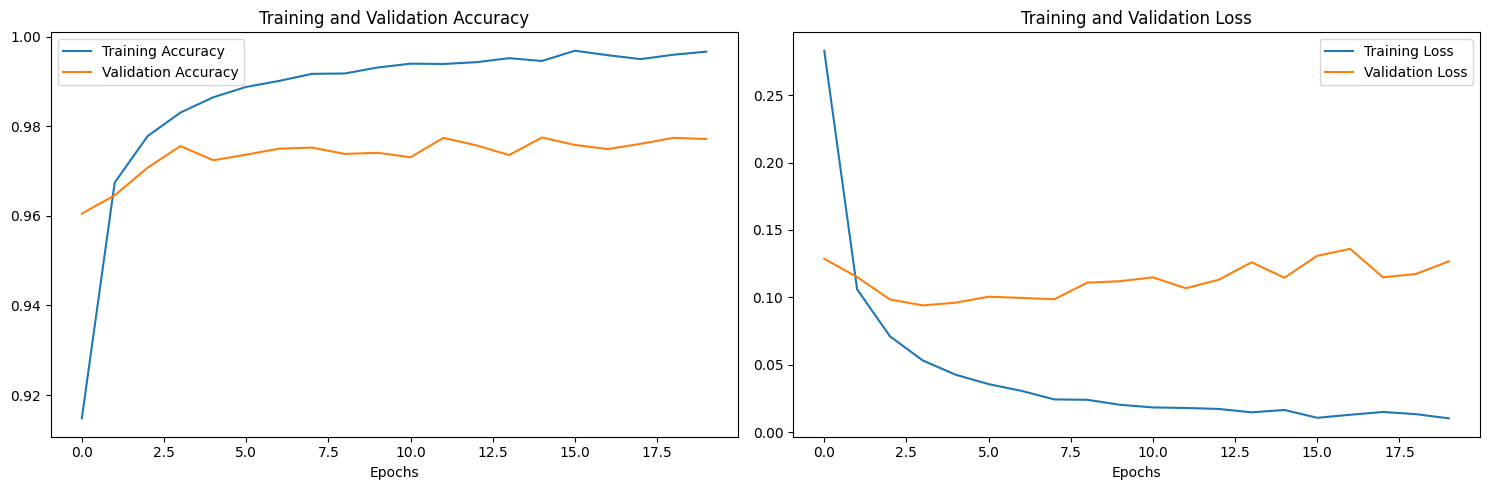

In [4]:
# -*- coding: utf-8 -*-
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import get_file, to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 下載MNIST數據集
mnist_file = get_file('mnist.npz', origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')
mnist = np.load(mnist_file)

# 數據預處理
train_images, train_labels = mnist['x_train'], mnist['y_train']
test_images, test_labels = mnist['x_test'], mnist['y_test']


# 將圖像展平並標準化
train_images = train_images.reshape((train_images.shape[0], 28 * 28)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28 * 28)) / 255.0
# 將標籤轉換為one-hot編碼
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


# 構建DNN模型
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型，並保留驗證集
history = model.fit(train_images, train_labels, batch_size=100, epochs=20, validation_split=0.2)

# 創建一個具有兩個子圖的圖形
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 第一個子圖 - 訓練的準確率變化
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# 第二個子圖 - 訓練的損失變化
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# 設置兩個子圖之間的間距
plt.tight_layout()
plt.show()


In [6]:
score = model.evaluate(test_images,test_labels)
print('loss:',score[0])
print('acc:',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9747 - loss: 0.1285
loss: 0.11290786415338516
acc: 0.9775000214576721


In [7]:
import numpy as np

# 假設 model 已經訓練完畢
# 準備測試資料，這裡使用 x_test
x_test_sample = test_images[:5]  # 取測試集中的前 5 筆資料

# 使用 predict 方法進行預測
predictions = model.predict(x_test_sample)

# 列印預測結果 (每一筆資料的機率分布)
print("每個數字的預測機率：")
print(predictions)

# 將機率分布轉換為預測的類別 (使用 argmax 找到機率最大的位置)
predicted_classes = np.argmax(predictions, axis=1)

# 列印預測的類別
print("預測的數字為：", predicted_classes)

# 比較真實標籤與預測結果
actual_classes = np.argmax(test_labels[:5], axis=1)  # 真實的數字標籤
print("真實的數字為：", actual_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
每個數字的預測機率：
[[7.7034433e-16 5.7784819e-11 5.2133506e-14 1.7355891e-09 1.7338323e-13
  5.4671431e-17 5.9837822e-19 1.0000000e+00 7.2297181e-13 1.8480900e-08]
 [4.5763415e-14 1.2575117e-06 9.9999869e-01 1.5009957e-11 1.3583557e-19
  2.6594109e-18 4.8977745e-17 4.4825683e-13 5.5829059e-16 3.2938740e-16]
 [2.1774313e-09 9.9999988e-01 2.9606734e-11 1.3190355e-12 3.3189661e-08
  1.5018145e-10 2.8463307e-10 1.2410631e-07 2.4707919e-08 4.0471355e-09]
 [9.9999988e-01 1.1673776e-12 9.9629427e-10 5.8756009e-09 1.4316132e-09
  5.9368122e-10 2.9105658e-08 5.9106336e-10 1.2178283e-11 1.2294805e-07]
 [2.2326831e-10 4.3846978e-11 5.9144950e-12 3.0616440e-14 9.9999976e-01
  4.2524639e-14 3.5620406e-12 2.3683061e-11 1.4676810e-12 1.8957873e-07]]
預測的數字為： [7 2 1 0 4]
真實的數字為： [7 2 1 0 4]
